<a href="https://colab.research.google.com/github/Psyrus7/AtharvaShinde_INBT04755_September2023/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
#importing TensorFlow, Keras, pandas and NumPy here
import tensorflow as TF
import keras as ks
import pandas as pd
import numpy as num

In [5]:
from keras.datasets import cifar10 as cifar
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.layers import Flatten, Dense, Dropout,Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras import layers, models

#Using VGG16 as Transfer Learning Model:




In [48]:
#loading the CIFAR10 dataset here
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [49]:
#Splitting the dataset in 80% training set and 20% testing set
x_train, x_value, y_train, y_value = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
# Displaying the shapes of the datasets to verify whether the split is proper or not
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valueue shape:", x_value.shape)
print("y_valueue shape:", y_value.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 1)
x_value shape: (10000, 32, 32, 3)
y_value shape: (10000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [50]:
# Normalizing the pixel values to be in the range [0, 1]
x_train = x_train.astype('float32') / 255
x_value = x_value.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [51]:
subset_size = 5000  # Using a smaller subset due to high training time while using whole dataset
x_train_sub, y_train_sub = x_train[:subset_size], y_train[:subset_size]

In [52]:
#here defining the properties for VGG16 TLM.
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [53]:
# Creating a new model by adding custom top layers to the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

In [54]:
# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.000077),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

In [17]:
#summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 14848586 (56.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
#Training the model
history = model.fit(x_train_sub, y_train_sub, epochs=10, batch_size=256, validation_split=0.2)

Epoch 1/10
16/16 [==============================] - 407s 25s/step - loss: 2.2097 - sparse_categorical_accuracy: 0.1988 - val_loss: 1.7187 - val_sparse_categorical_accuracy: 0.4210
Epoch 2/10
16/16 [==============================] - 403s 25s/step - loss: 1.6406 - sparse_categorical_accuracy: 0.4135 - val_loss: 1.2959 - val_sparse_categorical_accuracy: 0.5670
Epoch 3/10
16/16 [==============================] - 388s 24s/step - loss: 1.2783 - sparse_categorical_accuracy: 0.5638 - val_loss: 1.1518 - val_sparse_categorical_accuracy: 0.5770
Epoch 4/10
16/16 [==============================] - 404s 25s/step - loss: 1.0472 - sparse_categorical_accuracy: 0.6390 - val_loss: 1.0246 - val_sparse_categorical_accuracy: 0.6360
Epoch 5/10
16/16 [==============================] - 399s 25s/step - loss: 0.8915 - sparse_categorical_accuracy: 0.6975 - val_loss: 0.9830 - val_sparse_categorical_accuracy: 0.6590
Epoch 6/10
16/16 [==============================] - 391s 24s/step - loss: 0.7689 - sparse_categorica

In [19]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

313/313 - 114s - loss: 0.9629 - sparse_categorical_accuracy: 0.7179 - 114s/epoch - 366ms/step
Test accuracy: 71.79%


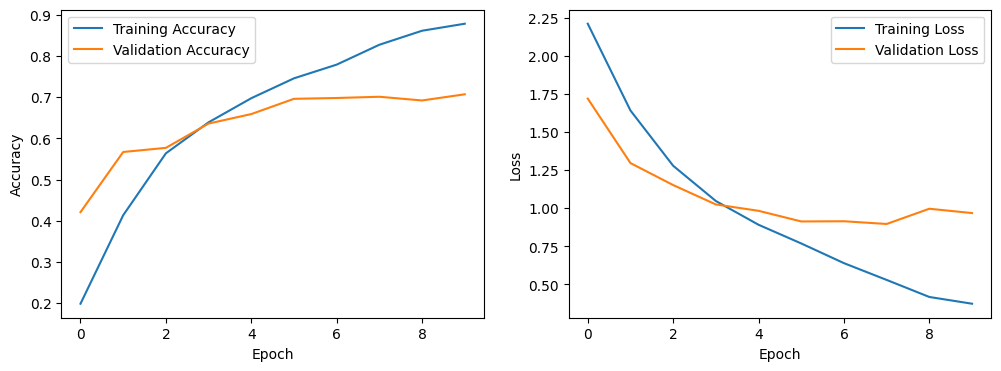

313/313 - 132s - loss: 1.0080 - sparse_categorical_accuracy: 0.7095 - 132s/epoch - 423ms/step
Test accuracy: 70.95%


In [30]:
#Using matplotlib for displaying analytical results for the model using graphs
import matplotlib.pyplot as plt
# Visualize the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


#Custom CNN MOdel :

In [32]:
#loading the dataset here
(x_train, y_train), (x_test, y_test) = cifar.load_data()

In [33]:
#assigning variables to the splittedd dataset:
x_train, x_value, y_train, y_value = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [34]:
# Normalizing the pixel values to be in the range [0, 1]
x_train = x_train.astype('float32') / 255
x_value = x_value.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [55]:
# Creating a custom CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(10, activation='softmax'))

In [56]:
learning_rate = 0.00050

In [57]:
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       36992     
                                                                 
 flatten_1 (Flatten)         (None, 21632)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2769024   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [39]:
# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_value, y_value))

Epoch 1/30
313/313 [==============================] - 90s 286ms/step - loss: 1.8928 - accuracy: 0.3097 - val_loss: 1.5064 - val_accuracy: 0.4732
Epoch 2/30
313/313 [==============================] - 85s 270ms/step - loss: 1.5759 - accuracy: 0.4276 - val_loss: 1.3296 - val_accuracy: 0.5449
Epoch 3/30
313/313 [==============================] - 91s 290ms/step - loss: 1.4616 - accuracy: 0.4717 - val_loss: 1.3118 - val_accuracy: 0.5427
Epoch 4/30
313/313 [==============================] - 87s 278ms/step - loss: 1.3707 - accuracy: 0.5068 - val_loss: 1.1634 - val_accuracy: 0.5894
Epoch 5/30
313/313 [==============================] - 86s 274ms/step - loss: 1.2973 - accuracy: 0.5380 - val_loss: 1.1288 - val_accuracy: 0.6136
Epoch 6/30
313/313 [==============================] - 86s 275ms/step - loss: 1.2375 - accuracy: 0.5569 - val_loss: 1.0672 - val_accuracy: 0.6337
Epoch 7/30
313/313 [==============================] - 86s 276ms/step - loss: 1.1914 - accuracy: 0.5731 - val_loss: 1.0396 - val_ac

In [42]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 6s 20ms/step - loss: 0.9597 - accuracy: 0.6984
Test Accuracy: 69.84%


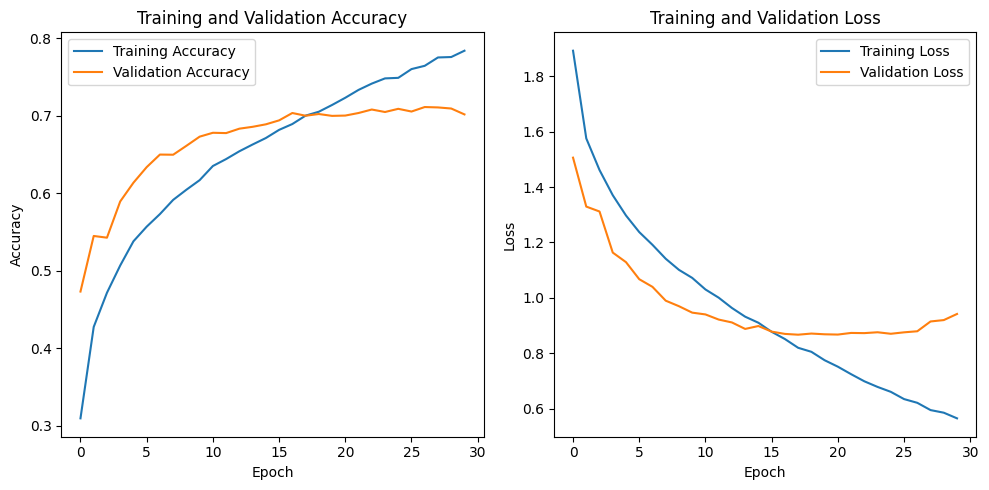

In [43]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
